# importing

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

root = "E:/ricePhenoExt/colorchecker"
colorchecker_path  = os.path.join(root,"cc1_L.jpg")


img = cv2.imdecode(np.fromfile(colorchecker_path, dtype=np.uint8), -1)

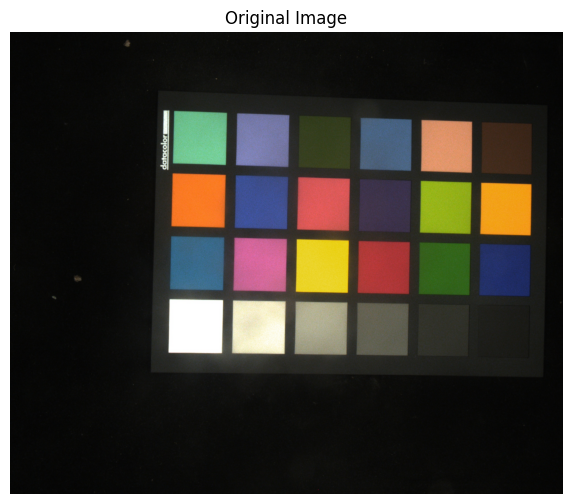

In [2]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # 转换为RGB
plt.axis('off') 
plt.title('Original Image')
plt.show()

# detection

In [ ]:
detector = cv2.mcc.CCheckerDetector_create()
detector.process(img, cv2.mcc.MCC24)  # 检测图像
checker = detector.getBestColorChecker()  # 提取色卡对象

72

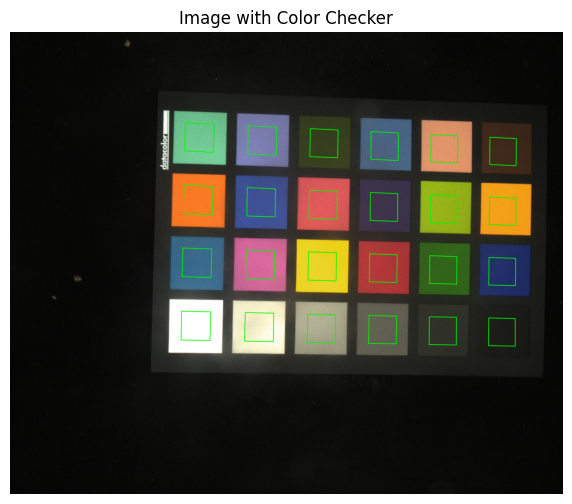

In [9]:
# 绘图
cdraw = cv2.mcc.CCheckerDraw_create(checker)
img_draw = img.copy()
cdraw.draw(img_draw)
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image with Color Checker')
plt.show()


# compare color

In [14]:
chartsRGB = checker.getChartsRGB()
src = chartsRGB[:, 1].copy().reshape(24, 1, 3)
src /= 255.0


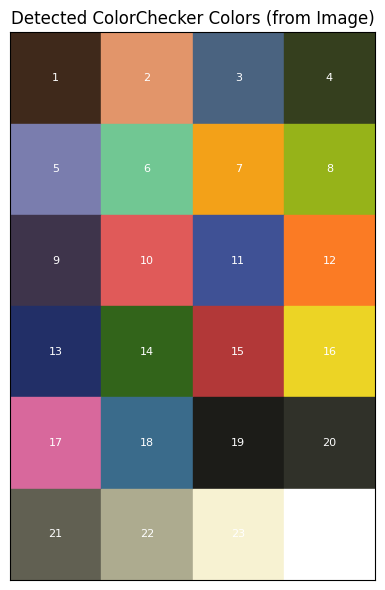

In [15]:
# src 是 shape (24, 1, 3)，取出并 squeeze
colors = src.squeeze()  # shape: (24, 3), 每行是 RGB，值范围在 0~1

# 绘制 6 行 4 列的颜色块
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(24):
    row = i // 4
    col = i % 4
    rect = plt.Rectangle((col, 5 - row), 1, 1, color=colors[i])
    ax.add_patch(rect)
    ax.text(col + 0.5, 5 - row + 0.5, str(i+1), ha='center', va='center', fontsize=8, color='white')

# 设置图像范围和样式
ax.set_xlim(0, 4)
ax.set_ylim(0, 6)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title("Detected ColorChecker Colors (from Image)")
plt.tight_layout()
plt.show()


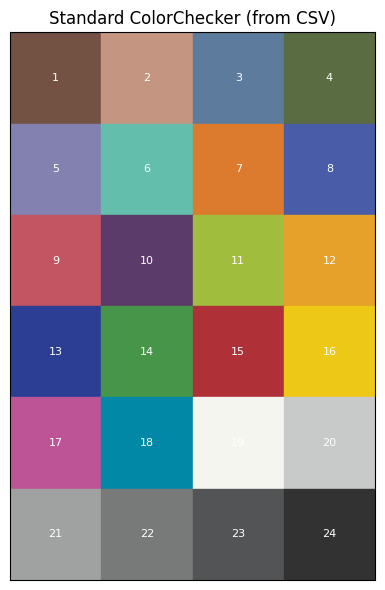

In [18]:
import pandas as pd

# 读取标准色卡 CSV（RGB 值范围应是 0~255）
file_path = r'E:\ricePhenoExt\python-macduff-colorchecker-detector\color_data\BabelColor_Avg_2006.csv'
std_df = pd.read_csv(file_path, header=None, names=['R', 'G', 'B'], na_values=[' ', 'NaN'])

# 转换为归一化 RGB 数组（值范围为 0~1）
standard_colors = std_df[['R', 'G', 'B']].values / 255.0  # shape (24, 3)
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(24):
    row = i // 4
    col = i % 4
    color = standard_colors[i]
    rect = plt.Rectangle((col, 5 - row), 1, 1, color=color)
    ax.add_patch(rect)
    ax.text(col + 0.5, 5 - row + 0.5, str(i + 1), ha='center', va='center', fontsize=8, color='white')

# 图形美化
ax.set_xlim(0, 4)
ax.set_ylim(0, 6)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title("Standard ColorChecker (from CSV)")
plt.tight_layout()
plt.show()

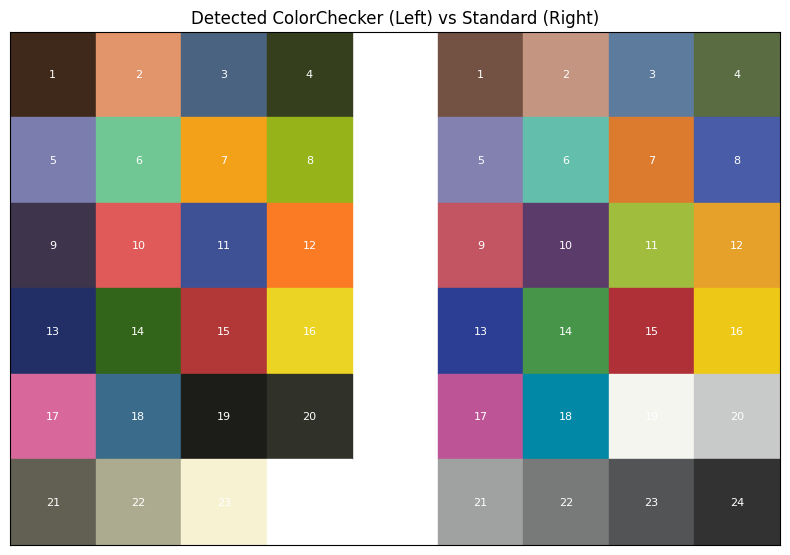

In [19]:
# 检测色卡（图像中提取的颜色）
detected_colors = src.squeeze()  # shape (24, 3)

# 确保你已经读取标准色卡CSV并转换为归一化RGB：
# standard_colors = pd.read_csv(...)[['R', 'G', 'B']].values / 255.0

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(24):
    row = i // 4
    col = i % 4
    
    # 左列：检测颜色（来自图像）
    rect1 = plt.Rectangle((col, 5 - row), 1, 1, color=detected_colors[i])
    ax.add_patch(rect1)
    
    # 右列：标准颜色（来自CSV）
    rect2 = plt.Rectangle((col + 5, 5 - row), 1, 1, color=standard_colors[i])
    ax.add_patch(rect2)
    
    # 标注编号
    ax.text(col + 0.5, 5 - row + 0.5, str(i + 1), ha='center', va='center', fontsize=8, color='white')
    ax.text(col + 5 + 0.5, 5 - row + 0.5, str(i + 1), ha='center', va='center', fontsize=8, color='white')

# 图形美化
ax.set_xlim(0, 9)
ax.set_ylim(0, 6)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title("Detected ColorChecker (Left) vs Standard (Right)")
plt.tight_layout()
plt.show()


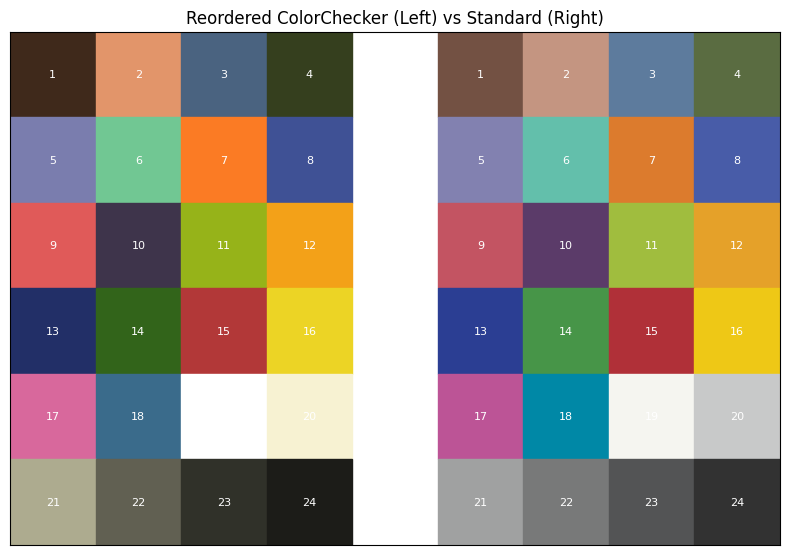

In [21]:
# 原始检测到的颜色数组（shape: 24, 3）
detected_colors = src.squeeze()  # shape (24, 3)

# 手动重排：7~12 倒序，19~24 倒序
reordered = np.concatenate([
    detected_colors[0:6],        # 1~6 正常
    detected_colors[6:12][::-1], # 7~12 倒序
    detected_colors[12:18],      # 13~18 正常
    detected_colors[18:24][::-1] # 19~24 倒序
], axis=0)

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(24):
    row = i // 4
    col = i % 4
    
    # 左列：检测颜色（来自图像）
    rect1 = plt.Rectangle((col, 5 - row), 1, 1, color=reordered[i])
    ax.add_patch(rect1)
    
    # 右列：标准颜色（来自CSV）
    rect2 = plt.Rectangle((col + 5, 5 - row), 1, 1, color=standard_colors[i])
    ax.add_patch(rect2)
    
    # 标注编号
    ax.text(col + 0.5, 5 - row + 0.5, str(i + 1), ha='center', va='center', fontsize=8, color='white')
    ax.text(col + 5 + 0.5, 5 - row + 0.5, str(i + 1), ha='center', va='center', fontsize=8, color='white')

# 图形美化
ax.set_xlim(0, 9)
ax.set_ylim(0, 6)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title("Reordered ColorChecker (Left) vs Standard (Right)")
plt.tight_layout()
plt.show()

# calculate

In [22]:
# 原始的 src（shape: 24, 1, 3）
src_raw = chartsRGB[:, 1].copy().reshape(24, 3) / 255.0  # 先 reshape 为 (24, 3)

# 修正顺序
src_corrected = np.concatenate([
    src_raw[0:6],
    src_raw[6:12][::-1],
    src_raw[12:18],
    src_raw[18:24][::-1]
], axis=0)

# 再 reshape 回 (24, 1, 3)，以供 ColorCorrectionModel 使用
src = src_corrected.reshape(24, 1, 3)

In [25]:
model1 = cv2.ccm_ColorCorrectionModel(src, cv2.mcc.MCC24)
model1.run()
ccm = model1.getCCM()
print("ccm ", ccm)
loss = model1.getLoss()
print("loss ", loss)

ccm  [[ 0.98948805 -0.10281211 -0.07385449]
 [ 0.10050432  1.20347975  0.18892033]
 [-0.01947019  0.06403464  1.39816129]]
loss  8.902390509997083


## ✅ 一、CCM 含义简介

CCM 是一个 `3×3` 的颜色变换矩阵，用于将图像中的 RGB 颜色映射到目标（如 Macbeth 色卡）颜色空间：

\[
\begin{bmatrix}
R_{cal} \\
G_{cal} \\
B_{cal}
\end{bmatrix}
=
\text{CCM} \cdot
\begin{bmatrix}
R \\
G \\
B
\end{bmatrix}
\]

每行表示 **输出通道**（R', G', B'）由原始通道加权组成。

---

## ✅ 二、对这个矩阵的具体分析

```text
[[ 0.989  -0.103  -0.074 ]   ⟶ 修正 R 分量：降低 G 和 B 对 R 的影响
 [ 0.100   1.203   0.189 ]   ⟶ 修正 G 分量：提升 G 权重，加入少量 R 和 B
 [-0.019   0.064   1.398 ]]  ⟶ 修正 B 分量：大幅增强 B 通道响应
```

### 🎯 代表含义：
- R 通道相对稳定（接近单位矩阵），略微调整了 G 和 B 分量的干扰；
- G 通道明显提升（1.2×），意味着原图 G 偏暗/不够饱和；
- B 通道的 1.398 表示蓝色偏弱，校正时要大幅增强；
- 负值代表去除通道干扰，比如 `-0.102` 说明 G 分量对 R 有负干扰。

---

## ✅ 三、Loss 值解读

```text
loss = 8.90
```

这个值通常表示模型校正前后与目标色之间的误差（MSE 或 ΔE 平方和），可理解为：

- **< 3**：极佳（图像质量专业修正）
- **3~6**：不错（普通工业/科研可接受）
- **6~10**：色差可见（人眼敏感场景可能察觉）
- **> 10**：校正效果一般或原图偏差过大

### 🎯 所以这个值：
- `8.9` 属于**中等偏高**的误差，说明图像存在一定偏色，但校正后已经**基本收敛**；
- 如果你对色彩要求很高（如科研级成像），可以考虑优化：
  - 色卡检测区域准确度（遮挡/光照均匀性）
  - 相机白平衡、曝光设置
  - 图像压缩前是否已处理过颜色


## ✅ 总结

| 项 | 解读 |
|----|------|
| `CCM` | 校正了 G、B 明显偏暗的问题 |
| `Loss = 8.90` | 有一定误差，但校正效果已改善明显，图像偏色较明显 |


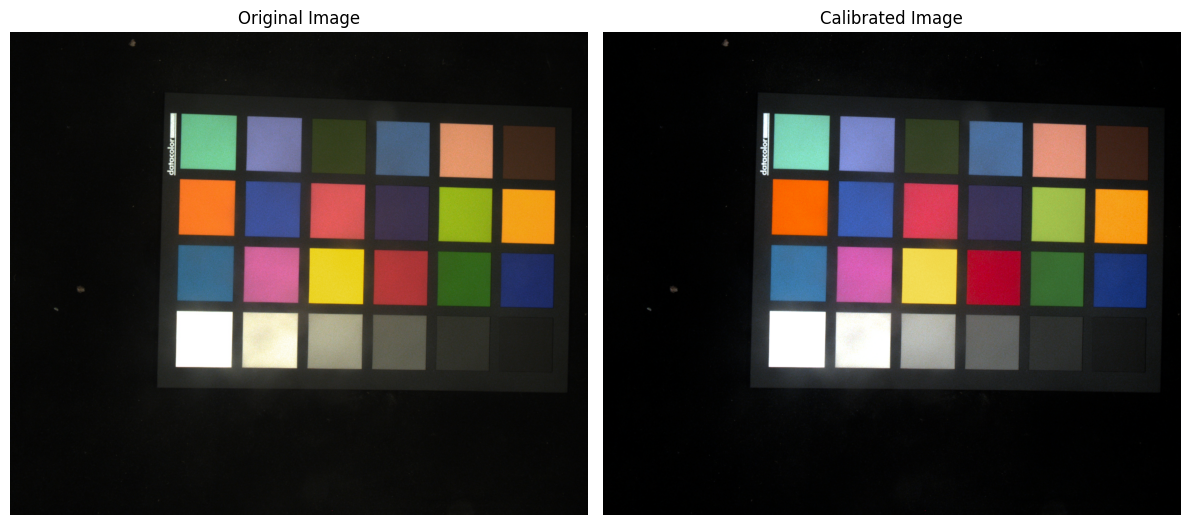

In [27]:
# 原图（BGR 转 RGB 归一化）
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float64) / 255

# 图像校正推理
calibratedImage = model1.infer(img_rgb)

# 恢复像素范围
out_ = calibratedImage * 255
out_[out_ < 0] = 0
out_[out_ > 255] = 255
out_ = out_.astype(np.uint8)

# 显示对比（左右并排）
plt.figure(figsize=(12, 6))

# 原图
plt.subplot(1, 2, 1)
plt.imshow((img_rgb * 255).astype(np.uint8))
plt.axis('off')
plt.title('Original Image')

# 校正图
plt.subplot(1, 2, 2)
plt.imshow(out_)
plt.axis('off')
plt.title('Calibrated Image')

plt.tight_layout()
plt.show()

# practical utilize

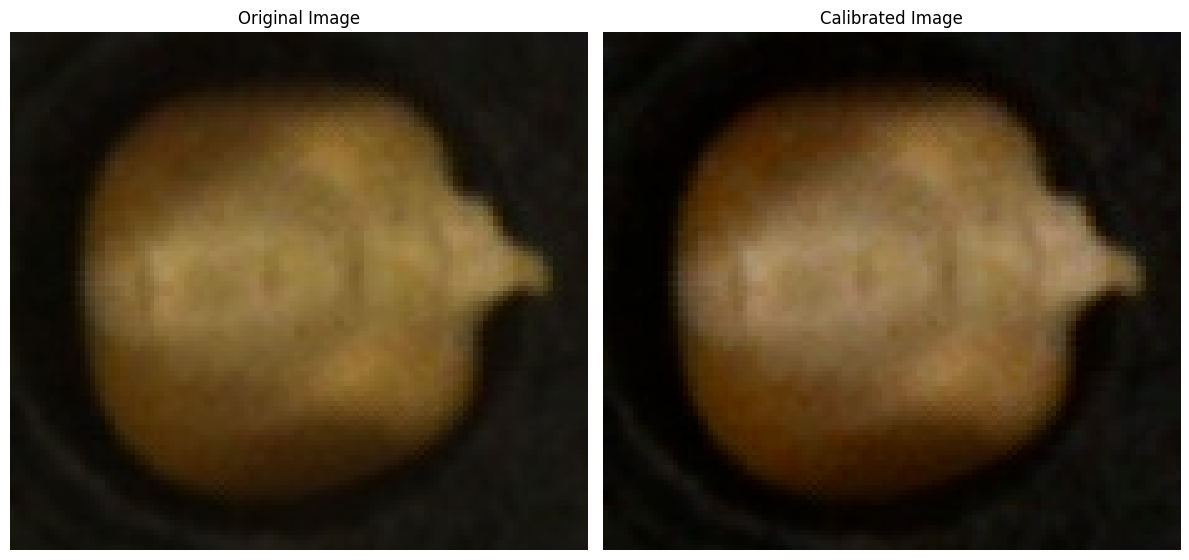

In [28]:
# 设置路径
folder = r"E:/maize/双面玉米照片1/双面玉米照片/isolation"
image_list = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# 读取第一张图片
first_image_path = os.path.join(folder, image_list[0])
img = cv2.imdecode(np.fromfile(first_image_path, dtype=np.uint8), -1)

# BGR → RGB & 归一化
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float64) / 255

# 推理颜色校正
calibrated = model1.infer(img_rgb)
calibrated = np.clip(calibrated * 255, 0, 255).astype(np.uint8)

# 显示对比图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow((img_rgb * 255).astype(np.uint8))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(calibrated)
plt.axis('off')
plt.title('Calibrated Image')

plt.tight_layout()
plt.show()


In [29]:
# 设置保存路径
output_folder = r"E:/maize/双面玉米照片1/双面玉米照片/isolation_corrected"
os.makedirs(output_folder, exist_ok=True)

# 遍历图像并批量处理
for img_name in image_list:
    img_path = os.path.join(folder, img_name)
    img = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8), -1)

    if img is None:
        print(f"跳过无法读取的图像：{img_name}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float64) / 255
    calibrated = model1.infer(img_rgb)
    calibrated = np.clip(calibrated * 255, 0, 255).astype(np.uint8)
    calibrated_bgr = cv2.cvtColor(calibrated, cv2.COLOR_RGB2BGR)

    # 保存校正后的图像
    save_path = os.path.join(output_folder, img_name)
    ext = os.path.splitext(img_name)[1]
    cv2.imencode(ext, calibrated_bgr)[1].tofile(save_path)

print("✅ 批量校正完成，保存于：", output_folder)


✅ 批量校正完成，保存于： E:/maize/双面玉米照片1/双面玉米照片/isolation_corrected
